# Exploratory Data Analysis - Retail

Krishna Priya, Data Science Intern at TSF
GRIP August 2021
Dataset: https://bit.ly/3i4rbWl

In [113]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pl

from warnings import *
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Data Analysis using tabulation and visualization

**`Sub-Category` wise analysis of `Sales` and `Profit`**

In [223]:
df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit', 'Quantity']].mean()
df_sub_category

,Sales,Discount,Profit,Quantity
Sub-Category,,,,
Accessories,215.974604,0.078452,54.111788,3.840000
Appliances,230.755710,0.166524,38.922758,3.710300
Art,34.068834,0.074874,8.200737,3.768844
Binders,133.560560,0.372292,19.843574,3.922521
Bookcases,503.859633,0.211140,-15.230509,3.807018
Chairs,532.332420,0.170178,43.095894,3.818476
Copiers,2198.941618,0.161765,817.909190,3.441176
Envelopes,64.867724,0.080315,27.418019,3.566929
Fasteners,13.936774,0.082028,4.375660,4.211982


Text(0.5, 1.0, 'Sales of each Product')

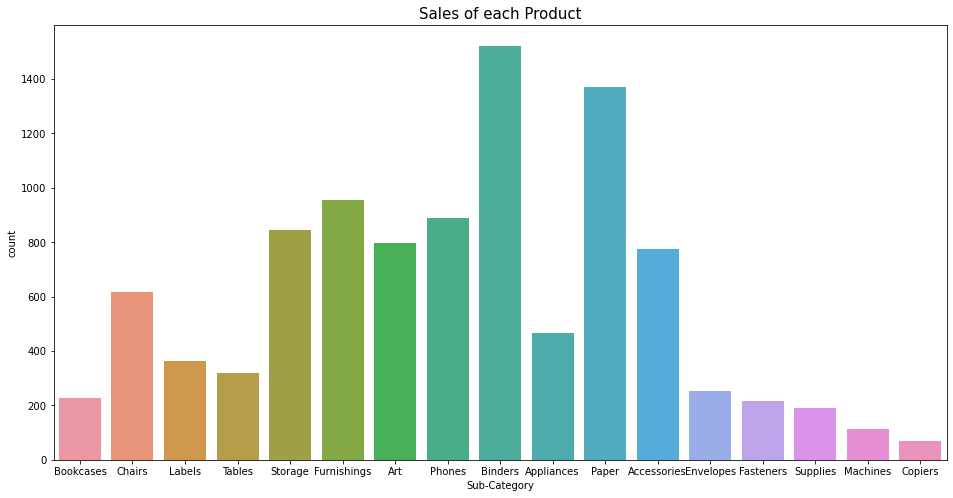

In [128]:
pl.figure(figsize=(16,8))
sb.countplot(df['Sub-Category'])
pl.title('Sales of each Product', fontsize=15)

Text(0.5, 1.0, 'Scatter Plot: Profit from Products')

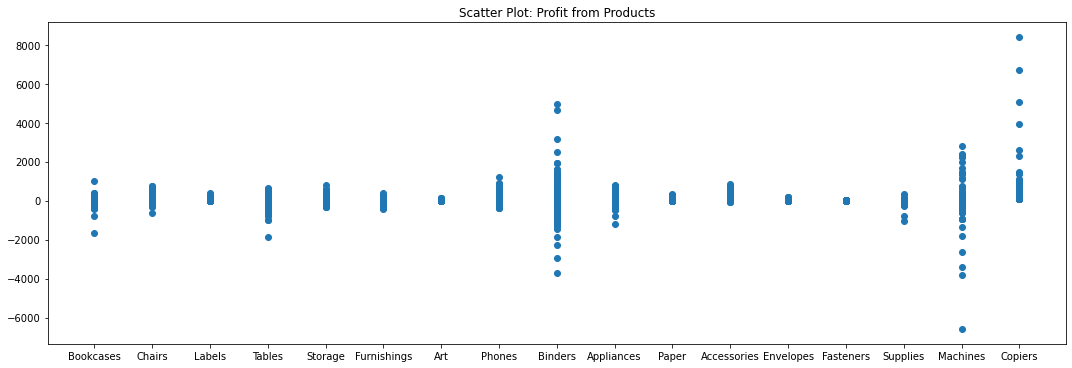

In [148]:
pl.scatter(df['Sub-Category'],df['Profit'])
pl.gcf().set_size_inches(15,5)
pl.tight_layout()
pl.title('Scatter Plot: Profit from Products', fontsize=12)

**Inferences:**
> On analyzing the plots, `Binders`, `Machines` and `Copiers` fetch high profit. `Copiers`, `Machines` and `Tables` are in huge demand and sales. 
> Inspite of the high sales in few products, it does not bring in an equivalent rate of profit. 
> Copiers, machines and book cases are not sold in large quantities but they have the potential for better profits. 
> The profit rate of paper, art and envelopes are not satisfactory. More focus can be given towards their sales strategy.

**`Location` wise analysis**

In [212]:
#DEALINGS- STATE WISE
df_deal = df['State'].value_counts()
df_deal.head(6)

California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Illinois         492
Name: State, dtype: int64

Text(0.5, 0, 'States')

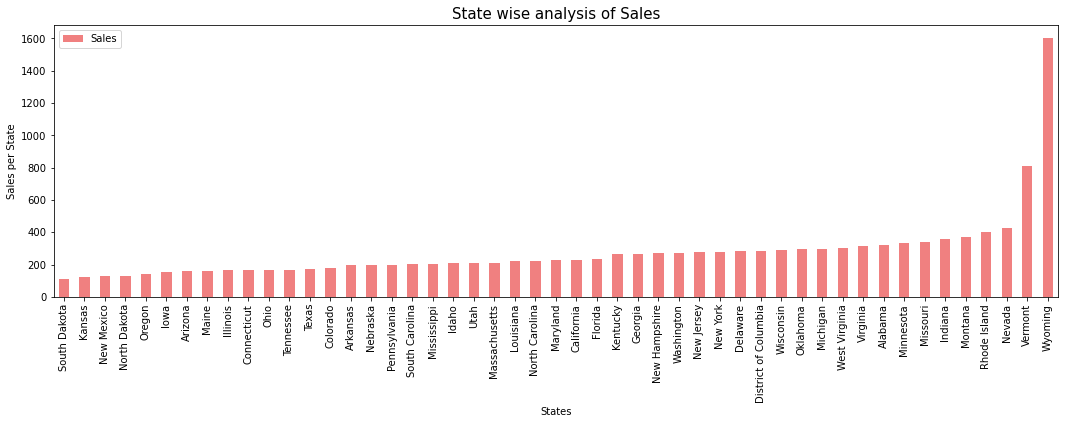

In [153]:
state = df.groupby(['State'])[['Sales', 'Profit']].mean()
state_sales = state.sort_values('Sales')
state_sales[['Sales']].plot(kind = 'bar', figsize=(18,5), color='lightcoral')
pl.title('State wise analysis of Sales', fontsize=15)
pl.ylabel('Sales per State')
pl.xlabel('States')

Highest Sales:
                1. Wyoming   2. Vermont   3. Nevada
             
Lowest Sales:
                1. South Dakota   2. Kansas   3. New Mexico

Text(0.5, 0, 'States')

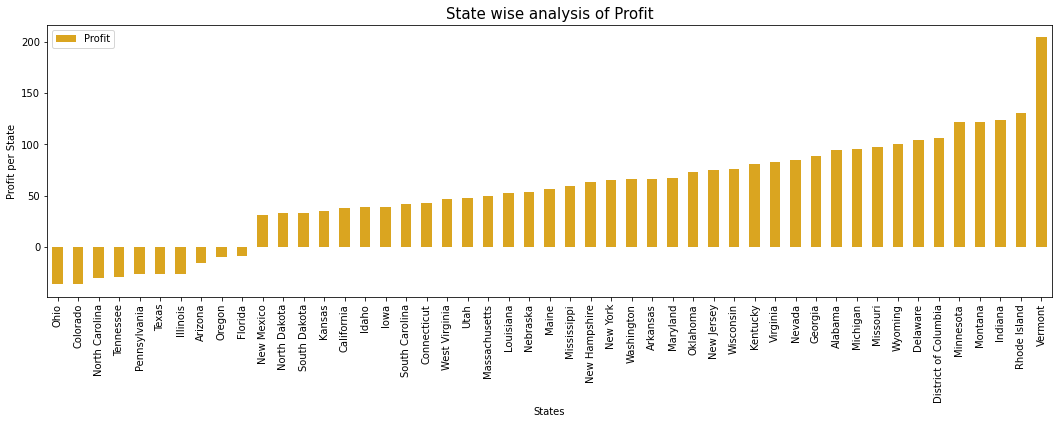

In [154]:
state_profit = state.sort_values('Profit')
state_profit[['Profit']].plot(kind = 'bar', figsize=(18,5), color='goldenrod')
pl.title('State wise analysis of Profit', fontsize=15)
pl.ylabel('Profit per State')
pl.xlabel('States')

High profit states:
                    1. Vermont   2. Rhode Island   3. Indiana
                
Low profit states:
                    1. Ohio   2. Colorado   3. North Carolina

In [217]:
avg = df['State'].value_counts().mean()
print("The average number of deals per state is", avg)

The average number of deals per state is 203.9591836734694


In [218]:
avg1 = df['City'].value_counts().mean()
print("The average number of deals per city is", avg1)

The average number of deals per city is 18.821092278719398


**State wise comparison of Sales and Profit**

1. The profit rate from Nevada needs to be focussed
2. The states with the lowest sales have the potential to fetch a comparatively better rate of profit
3. The low profits from North Carolina needs to be inspected
4. In a general trend, almost all states produce profit and growth equivalent to the sales rate of each product

In [163]:
df.pivot_table(values=['Sales','Profit','Quantity','Discount'], index='Region', aggfunc='median')

,Discount,Profit,Quantity,Sales
Region,,,,
Central,0.2,5.1840,3,45.980
East,0.0,8.1717,3,54.900
South,0.2,9.0720,3,54.594
West,0.0,11.1664,3,60.840


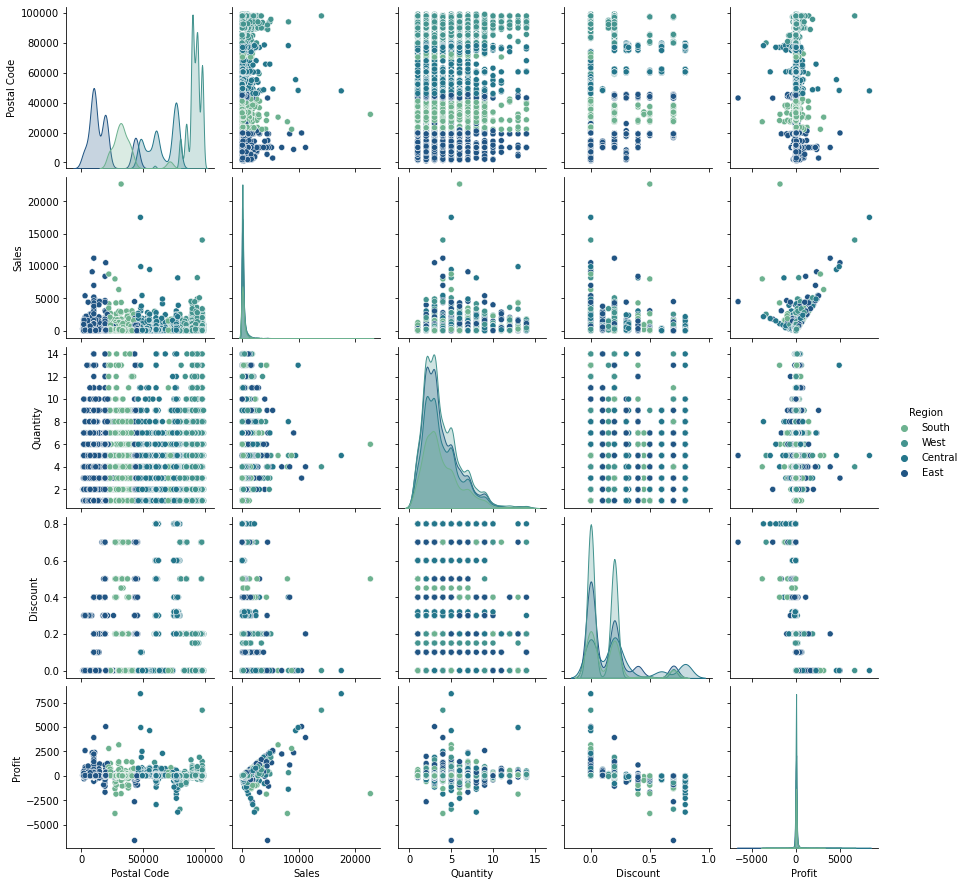

In [189]:
sb.pairplot(df, hue='Region', palette='crest') 

Text(0.5, 1.0, 'Region wise demand of each category')

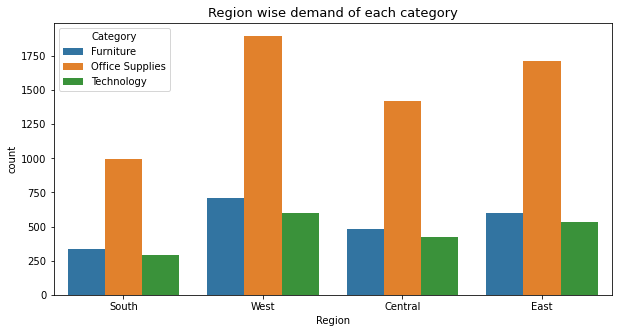

In [190]:
pl.figure(figsize=(10,5))
sb.countplot(x=df['Region'], hue=df['Category'])
pl.title('Region wise demand of each category', fontsize=13)

> `West` region of USA produces the biggest profits as well as the highest sales.
> Much emphasis can be given to the products under `Office Supplies` as they are of huge demand in all the four regions of USA. > The South region has lesser demand for furniture and technology related products. The needs of the people in these states need to be analysed and we can direct the required products accordingly.
> Marketing strategies for `Central` region of USA need to be improvised.

**Analysis on Profit and Sales**

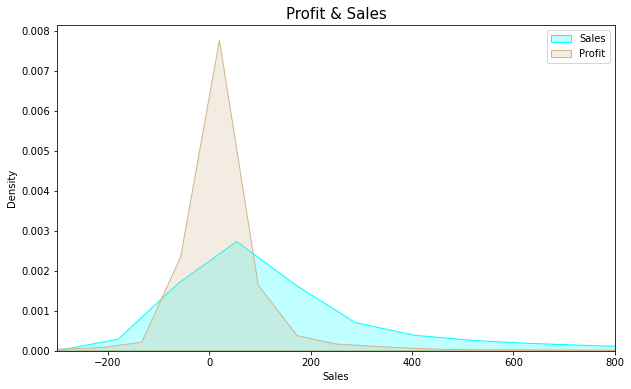

In [187]:
pl.figure(figsize=(10,6))
sb.kdeplot(df['Sales'], label='Sales', color='cyan', fill=True)
sb.kdeplot(df['Profit'], label='Profit', color='tan', fill=True)
pl.xlim([-300,800])
pl.title('Profit & Sales', fontsize=15)
pl.legend()

In [222]:
#CATEGORY WISE
df_category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit', 'Quantity']].mean()
df_category

,Sales,Discount,Profit,Quantity
Category,,,,
Furniture,349.834887,0.173923,8.699327,3.785007
Office Supplies,119.324101,0.157285,20.327050,3.801195
Technology,452.709276,0.132323,78.752002,3.756903


Text(0.5, 1.0, 'Category wise analysis')

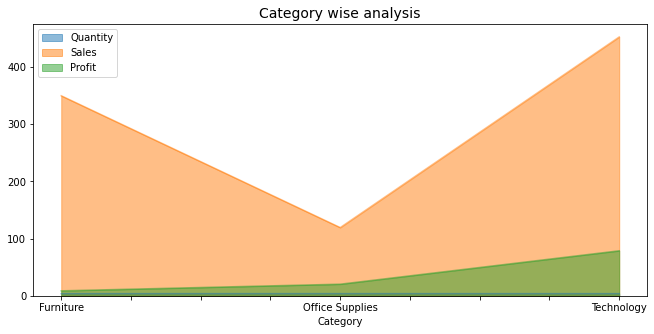

In [194]:
category =  df.groupby(['Category'])[['Quantity','Sales','Profit']].mean()
category.plot.area(stacked=False, figsize=(11,5))
pl.title('Category wise analysis', fontsize=14)

In [220]:
#SEGMENT WISE
df_segment= df.groupby(['Segment'])[['Sales', 'Discount', 'Profit', 'Quantity']].mean()
df_segment

,Sales,Discount,Profit,Quantity
Segment,,,,
Consumer,223.733644,0.158141,25.836873,3.760547
Corporate,233.823300,0.158228,30.456667,3.843709
Home Office,240.972041,0.147128,33.818664,3.782389


Text(0.5, 1.0, 'Segment wise analysis')

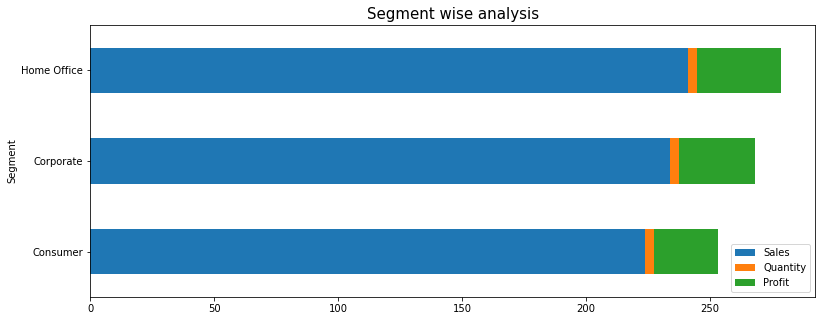

In [195]:
segment= df.groupby(['Segment'])[['Sales','Quantity','Profit']].mean()
segment.plot.barh(figsize=(13,5),stacked=True)
pl.title('Segment wise analysis', fontsize=15)

**Inferences:**

1. Highest sales and high profit are observed in Technology
2. Furniture produces the least profit inspite of high sales
3. Office supplies gives in good profit even with a below average sales

Text(0, 0.5, 'Distribution per unit')

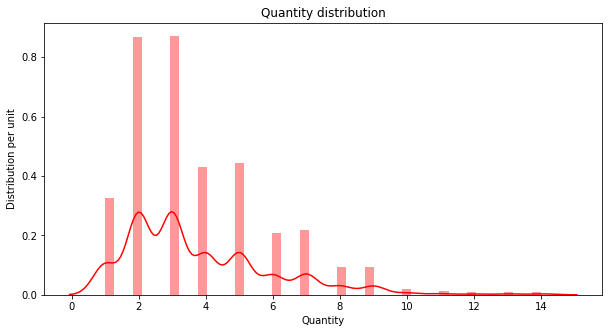

In [211]:
pl.figure(figsize=(10,5))
sb.distplot(df['Quantity'], color = 'red')
pl.title('Quantity distribution')
pl.ylabel('Distribution per unit')

**Correlation and Heatmap**

In [53]:
relation = df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

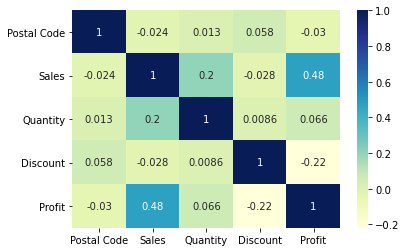

In [199]:
sb.heatmap(df.corr(), cmap='YlGnBu', annot=True)

**Inferences from Heatmap:**

1. The Quantity of products and Sales have a positive moderate correlation
2. Discount has not contributed to the Sales growth as they have a negative correlation
3. Sales and Profit of goods are positively correlated
4. Discount has a very less correlation with Quantity and Profit
5. Profit is only negatively correlated with Discount

**Influence of Discount**

In [172]:
df.pivot_table(values='Sales', index='Segment', columns=['Discount'], aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


Text(0.5, 1.0, 'Discount rates in Segments')

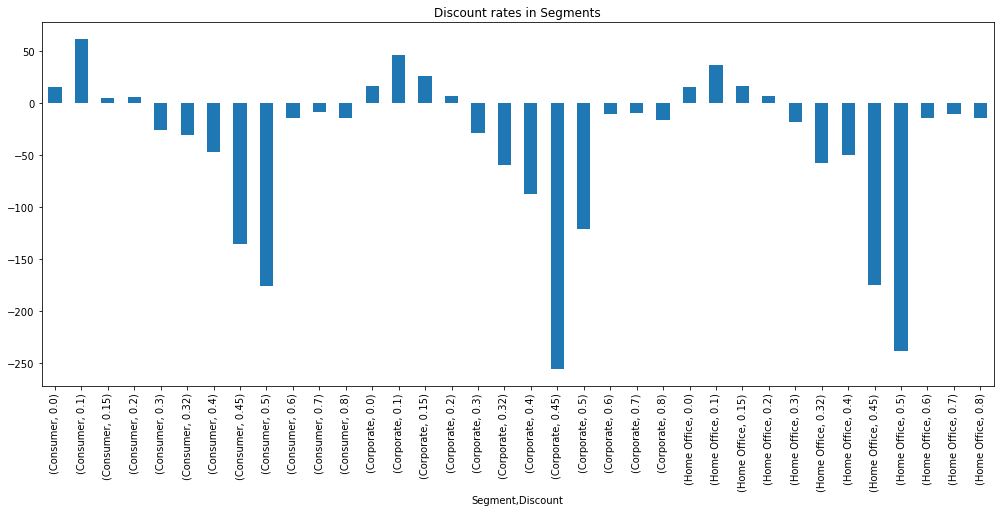

In [200]:
discount = df.groupby(['Segment','Discount']).Profit.median()
discount.plot(kind='bar', stacked=True)
pl.gcf().set_size_inches(14,7)
pl.tight_layout()
pl.title('Discount rates in Segments', fontsize=12)

Text(0.5, 1.0, 'Discount vs Profit')

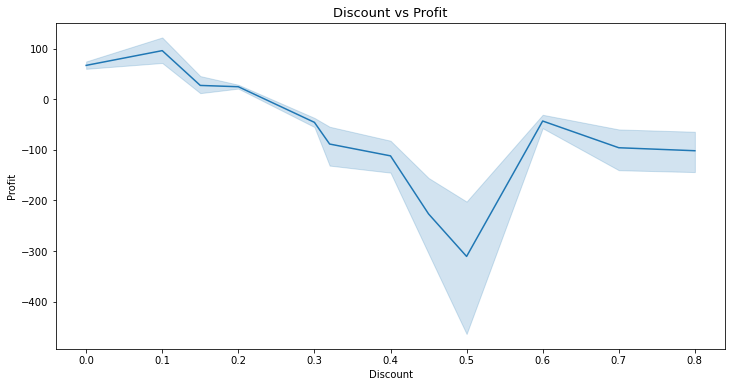

In [201]:
pl.figure(figsize = (12,6))
sb.lineplot(df['Discount'], df['Profit'])
pl.title('Discount vs Profit', fontsize=13)

**Inferences:**

1. Maximum profit is attained at very minimal discounts (0-0.1%) 
2. Profit rates gradually decrease with discount till the limit of 0.5%
3. For discounts above 0.5%, there is a sharp increase in profit

**Pie chart analysis**

Text(0.5, 1.0, 'Sub-Category wise analysis of Sales')

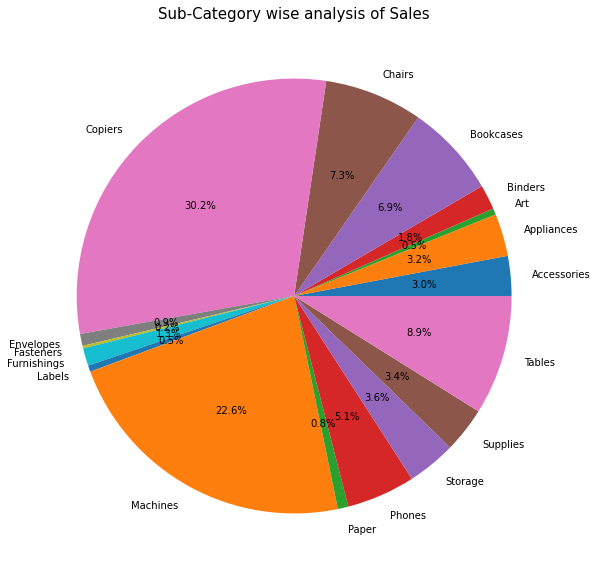

In [204]:
sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
pl.figure(figsize = (10,10))
pl.pie(sub_category['Sales'], labels = sub_category.index, autopct = '%1.1f%%')
pl.title('Sub-Category wise analysis of Sales', fontsize = 15)

Text(0.5, 1.0, 'Sub-Category wise analysis of Discount')

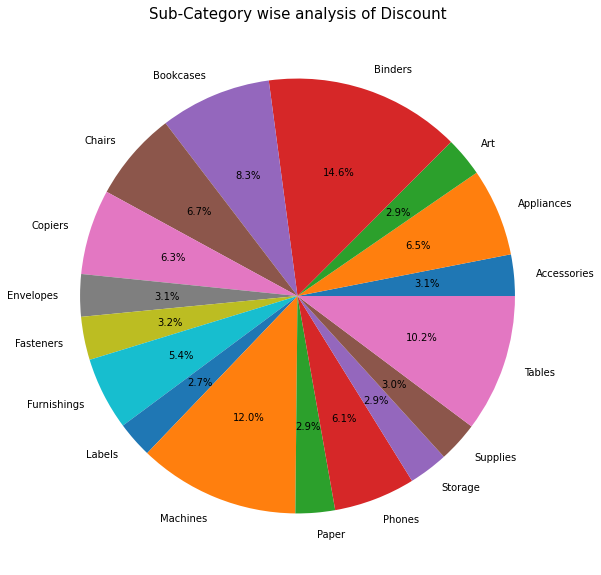

In [205]:
pl.figure(figsize = (10,10))
pl.pie(sub_category['Discount'], labels = sub_category.index, autopct = '%1.1f%%')
pl.title('Sub-Category wise analysis of Discount', fontsize = 15)

In [182]:
#PRODUCTS OF LEAST SALES
least = ['Fasteners','Labels','Art','Paper','Envelopes']
least_region = df.groupby(['Region','Sub-Category']).size().unstack()
least_region = least_region[least]
least_region

Sub-Category,Fasteners,Labels,Art,Paper,Envelopes
Region,,,,,
Central,55,76,176,321,59
East,61,107,228,378,74
South,29,65,142,221,54
West,72,116,250,450,67


High sales:
   1. Copiers
   2. Machines
   3. Tables
            
High discount:
   1. Binders
   2. Machines
   3. Bookcases
             
Inferences:
   1. The supply of art materials can be reduced
   2. Machines have high sales because of high discounts too
   3. Despite low discounts, copiers have a good sales growth

**Shipping mode analysis using factor plots**

In [126]:
(df['Ship Mode'].value_counts()/df.shape[0])*100

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

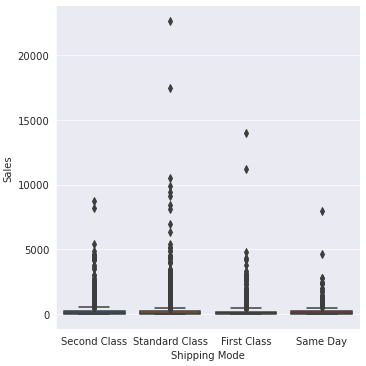

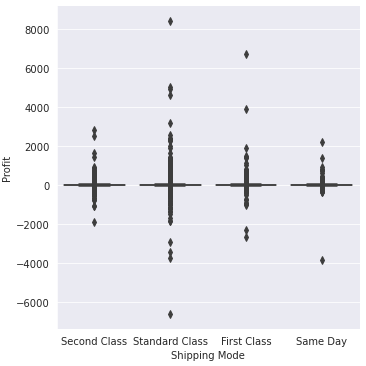

In [54]:
with sb.axes_style(style='darkgrid'):
    g1 = sb.catplot('Ship Mode','Sales', data=df, kind="box")
    g1.set_axis_labels("Shipping Mode", "Sales")
    g2 = sb.catplot('Ship Mode','Profit', data=df, kind="box")
    g2.set_axis_labels("Shipping Mode", "Profit")

**Inferences:**

1. Sales and Profit have an equivalent relation in second class shipping mode
2. High Discount provided in first class yearns more profit
3. Sales is high for same day shipping

## CONCLUSION:

-> In general trend, more profit is achieved but there are fields where profit could be increased. These can be analysed product wise, demand wise and sales wise.

-> Profit high in second class shipping mode. This can be due to the price rate provided in second class shipping.

-> High sales is observed in standard shipping mode.

-> The products that fetch high profits are associated with good rates of discount.

-> Despite low sales, such as Iowa, Nebraska, Akansas, Maine, etc. have the potential to fetch a comparatively better rate of profit. On the other hand, a regular customer demand is required to maintain the high moving products in these states.

-> Despite minimal discount, West region of USA produces better profit as well as higher sales. 

-> A marketing plan needs to be devised to move technology products among the Office and Consumer segments. 

-> Discount does not majorly affect the sales, profit and growth. Whereas, they are approached differently by the different segments. 

-> The discount provided for binders, copiers and machines can be decreased.

-> Lowest Number of deals and highest amount of sales is observed in Wyoming(11.8%)

-> Segment wise analysis: (in increasing order)
   Sales - Consumer, Corporate, Home Office 
   Highest Profit - Home Office, Corporate, Consumer